In [422]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

In [423]:
#import to dataset
df = pd.read_csv("Uber Request Data.csv")
df.head(5)

,Request id,Pickup point,Driver id,Status,Request timestamp,Drop timestamp
0,619,Airport,1.0,Trip Completed,11/7/2016 11:51,11/7/2016 13:00
1,867,Airport,1.0,Trip Completed,11/7/2016 17:57,11/7/2016 18:47
2,1807,City,1.0,Trip Completed,12/7/2016 9:17,12/7/2016 9:58
3,2532,Airport,1.0,Trip Completed,12/7/2016 21:08,12/7/2016 22:03
4,3112,City,1.0,Trip Completed,13-07-2016 08:33:16,13-07-2016 09:25:47


In [424]:
#dimension
df.shape

(6745, 6)

In [425]:
#checking for any duplicate rows in dataframe
df.drop_duplicates(keep = 'first',inplace = True)
df.shape

(6745, 6)

#### No duplicates found in the dataset so that good:)

In [426]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6745 entries, 0 to 6744
Data columns (total 6 columns):
Request id           6745 non-null int64
Pickup point         6745 non-null object
Driver id            4095 non-null float64
Status               6745 non-null object
Request timestamp    6745 non-null object
Drop timestamp       2831 non-null object
dtypes: float64(1), int64(1), object(4)
memory usage: 368.9+ KB


In [427]:
df.isnull().sum()

Request id              0
Pickup point            0
Driver id            2650
Status                  0
Request timestamp       0
Drop timestamp       3914
dtype: int64

In [428]:
#percentage of null values
round(100*df.isnull().sum()/len(df),2)

Request id            0.00
Pickup point          0.00
Driver id            39.29
Status                0.00
Request timestamp     0.00
Drop timestamp       58.03
dtype: float64

##### We can see that Driver id and Drop timestamp has a lot of null values, for drop times.... the rides may have cancelled or no cars avalible at that point of time, can be the case.
##### Lets convest the date formats to proper ones, lets just dive into it

In [429]:
#getting the time and date to proper format
df['Request timestamp'] = df['Request timestamp'].astype(str)
df['Request timestamp'] = df['Request timestamp'].str.replace("/", "-")
df['Request timestamp'] = pd.to_datetime(df['Request timestamp'], dayfirst = True)
df.head(5)

,Request id,Pickup point,Driver id,Status,Request timestamp,Drop timestamp
0,619,Airport,1.0,Trip Completed,2016-07-11 11:51:00,11/7/2016 13:00
1,867,Airport,1.0,Trip Completed,2016-07-11 17:57:00,11/7/2016 18:47
2,1807,City,1.0,Trip Completed,2016-07-12 09:17:00,12/7/2016 9:58
3,2532,Airport,1.0,Trip Completed,2016-07-12 21:08:00,12/7/2016 22:03
4,3112,City,1.0,Trip Completed,2016-07-13 08:33:16,13-07-2016 09:25:47


In [430]:
df['Drop timestamp'] = df['Drop timestamp'].astype(str)
df['Drop timestamp'] = df['Drop timestamp'].str.replace("/","-")
df['Drop timestamp'] = pd.to_datetime(df['Drop timestamp'], dayfirst = True)
df.head(5)

,Request id,Pickup point,Driver id,Status,Request timestamp,Drop timestamp
0,619,Airport,1.0,Trip Completed,2016-07-11 11:51:00,2016-07-11 13:00:00
1,867,Airport,1.0,Trip Completed,2016-07-11 17:57:00,2016-07-11 18:47:00
2,1807,City,1.0,Trip Completed,2016-07-12 09:17:00,2016-07-12 09:58:00
3,2532,Airport,1.0,Trip Completed,2016-07-12 21:08:00,2016-07-12 22:03:00
4,3112,City,1.0,Trip Completed,2016-07-13 08:33:16,2016-07-13 09:25:47


In [431]:
#converting Driver id type int
#df['Driver id'] = pd.to_numeric(df['Driver id'], downcast='signed')
#df.head(5)

##### For more insights we need to have the time in terms of hours and days and months mostly to get to the specifics

In [432]:
#Extracting the month -- request time
df["Request month"] = df["Request timestamp"].dt.month
df[df["Request month"] != 7]

,Request id,Pickup point,Driver id,Status,Request timestamp,Drop timestamp,Request month


#### Since there is only data from July 2016 then its no point to look for month for analysis

In [433]:
#Extracting the day of the week -- request time
df["Request dayofweek"] = df["Request timestamp"].dt.dayofweek
#df[df["Request dayofweek"] == 4]
df.head(5)

,Request id,Pickup point,Driver id,Status,Request timestamp,Drop timestamp,Request month,Request dayofweek
0,619,Airport,1.0,Trip Completed,2016-07-11 11:51:00,2016-07-11 13:00:00,7,0
1,867,Airport,1.0,Trip Completed,2016-07-11 17:57:00,2016-07-11 18:47:00,7,0
2,1807,City,1.0,Trip Completed,2016-07-12 09:17:00,2016-07-12 09:58:00,7,1
3,2532,Airport,1.0,Trip Completed,2016-07-12 21:08:00,2016-07-12 22:03:00,7,1
4,3112,City,1.0,Trip Completed,2016-07-13 08:33:16,2016-07-13 09:25:47,7,2


### Univariate Analysis being performed here; 
#### Extracted the day of the week from request time to check if days in a week makes a difference but the graphs shown below shows there is no any effect of day of week

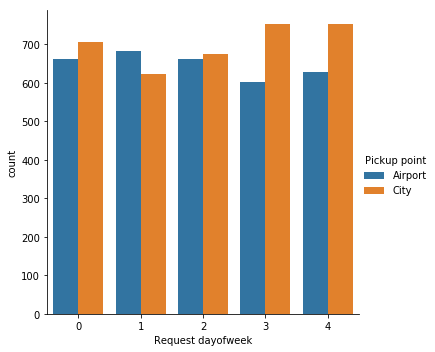

In [434]:
#univariate analysis plotting counts of dayofweek as for 'pickup point'
#reason of using factor plot here is since we are doing aggregation and what better than Factor plot for this use
sns.factorplot(x = "Request dayofweek", hue = "Pickup point", data = df, kind = "count")

#### There is no issues with the days in a week, like the dataset doesn't have weekneds in it, and in week days no day stands out to be analysed separatly, moving onto next then;

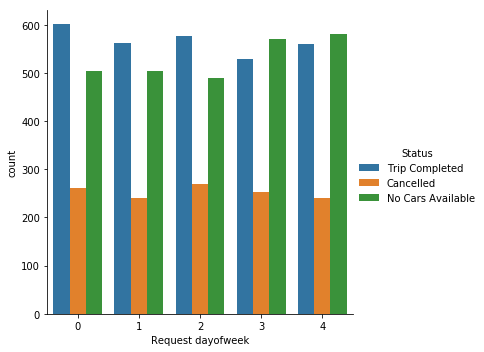

In [435]:
#univariate analysis plotting counts of request dayofweek as for 'status of ride'
#reason of using factor plot here is since we are doing aggregation and what better than Factor plot for this use
sns.factorplot(x = "Request dayofweek", hue = "Status", data = df, kind = "count")

##### now looking at the days and hours wise analysis as nothing found above

In [436]:
#Extracting the day of the month-- request time
df["Request day"] = df["Request timestamp"].dt.day
df.head(5)

,Request id,Pickup point,Driver id,Status,Request timestamp,Drop timestamp,Request month,Request dayofweek,Request day
0,619,Airport,1.0,Trip Completed,2016-07-11 11:51:00,2016-07-11 13:00:00,7,0,11
1,867,Airport,1.0,Trip Completed,2016-07-11 17:57:00,2016-07-11 18:47:00,7,0,11
2,1807,City,1.0,Trip Completed,2016-07-12 09:17:00,2016-07-12 09:58:00,7,1,12
3,2532,Airport,1.0,Trip Completed,2016-07-12 21:08:00,2016-07-12 22:03:00,7,1,12
4,3112,City,1.0,Trip Completed,2016-07-13 08:33:16,2016-07-13 09:25:47,7,2,13


In [437]:
#Extracting the hour -- request time
df["Request hour"] = df["Request timestamp"].dt.hour
df.head(5)

,Request id,Pickup point,Driver id,Status,Request timestamp,Drop timestamp,Request month,Request dayofweek,Request day,Request hour
0,619,Airport,1.0,Trip Completed,2016-07-11 11:51:00,2016-07-11 13:00:00,7,0,11,11
1,867,Airport,1.0,Trip Completed,2016-07-11 17:57:00,2016-07-11 18:47:00,7,0,11,17
2,1807,City,1.0,Trip Completed,2016-07-12 09:17:00,2016-07-12 09:58:00,7,1,12,9
3,2532,Airport,1.0,Trip Completed,2016-07-12 21:08:00,2016-07-12 22:03:00,7,1,12,21
4,3112,City,1.0,Trip Completed,2016-07-13 08:33:16,2016-07-13 09:25:47,7,2,13,8


##### plotting above derived columns to visualise data, going the way via bivariate analysis 

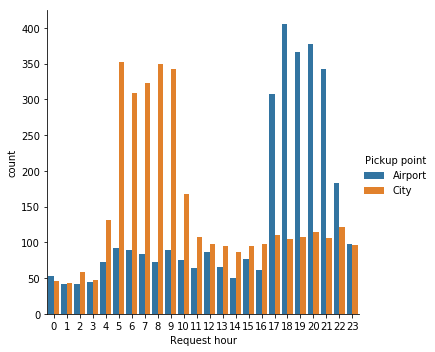

In [438]:
#getting plot for hours with respoect to Pickup
#reason of using factor plot here is since we are doing aggregation and what better than Factor plot for this use
sns.factorplot(x = "Request hour", hue = "Pickup point", data = df, kind = "count")

#### This shows that people i.e. Uber rides move in the morning or day time towards Airport more and during eveining time vice versa i.e. the rush hours at those times only

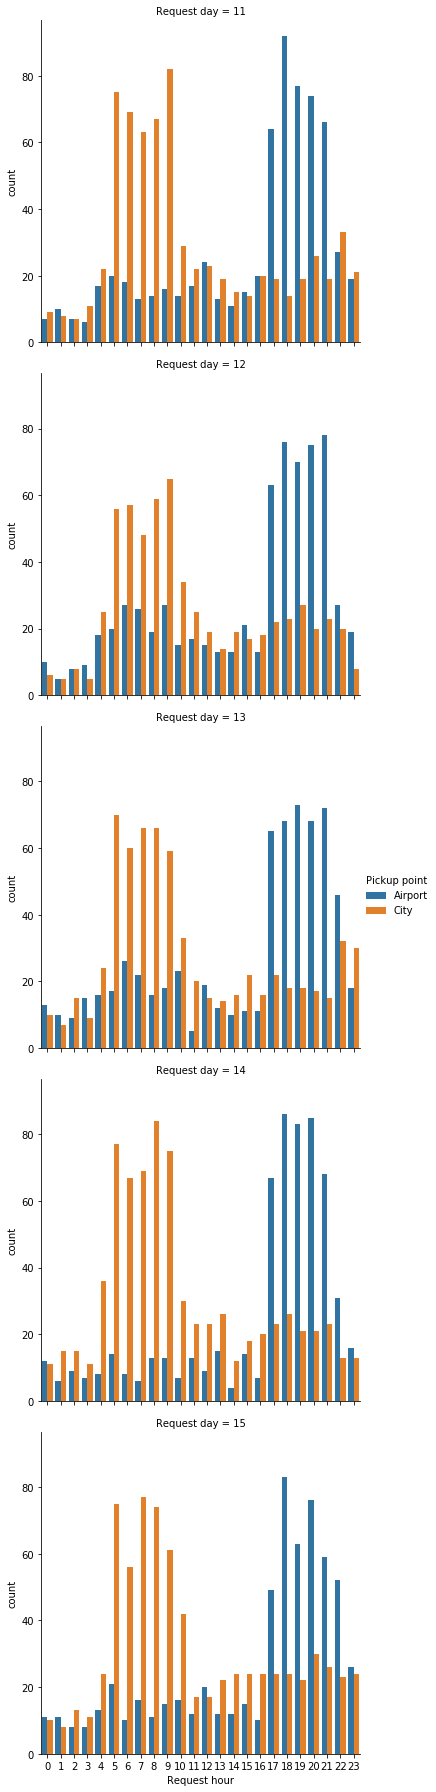

In [439]:
# plotting factor plot as per hourly manner taking day into considration for pickup point, on daily basis in simple terms
#reason of using factor plot here is since we are doing aggregation and what better than Factor plot for this use
sns.factorplot(x = "Request hour", hue = "Pickup point", row = "Request day", data = df, kind = "count")


#### Like mentioned earlier, its there for everyday, pattern repeats itself everyday

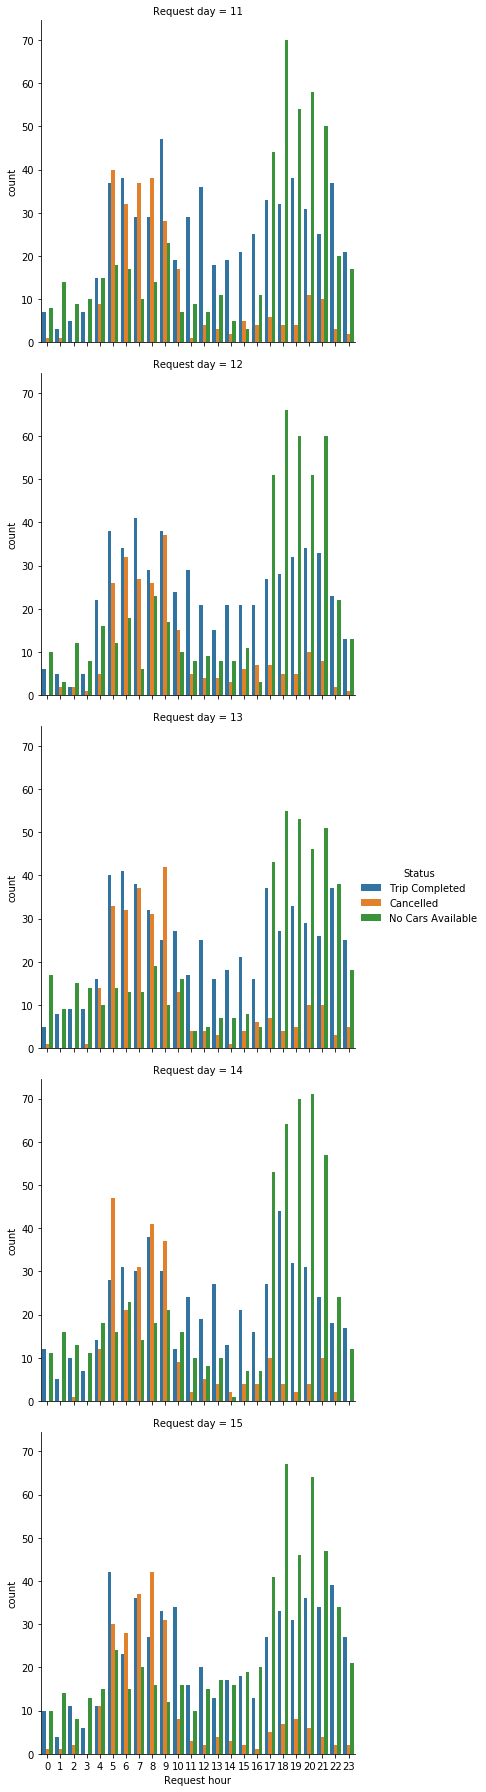

In [440]:
#similarly for status, i.e. daily status
#reason of using factor plot here is since we are doing aggregation and what better than Factor plot for this use
sns.factorplot(x = "Request hour", hue = "Status", row = "Request day", data = df, kind = "count")

#### After looking at all the plots, we can say that the cacellation rate is higher during morning time and no cabs are there during the late night time, irrespective of huge demand in the both times, Uber is unabale to provide the assistance to the users, demand supply chain is broken during these times, hence lets create those time slots to see further

In [441]:
# as suggested in the assignement and mentioned above lets divide the time into roughly five categories as mentioned below   
#we can also use df.cut() function to perform the same as below   
# time are taken roughly inspired from the video where this case study was expalined by Uber's analyst 
def time_slots(x):
    if x < 4:
        return "Early morning"
    elif 4 <= x < 10:
        return "Morning time"
    elif 10 <= x < 17:
        return "Day time"
    elif 17 <= x < 19:
        return "Evening time"
    elif 19 <= x < 23:
        return "Night time"
    else:
        return "Late Night"

df['time_slot'] = df["Request hour"].apply(lambda x: time_slots(x))

In [442]:
#depicting how many value each slot has from the dataset

#Trips made in each slot can be shown as:
df.time_slot.value_counts()

Morning time     2306
Night time       1718
Day time         1224
Evening time      928
Early morning     375
Late Night        194
Name: time_slot, dtype: int64

#### Simply plotting the slots with status to check the issue faced by the customer in a broder sense

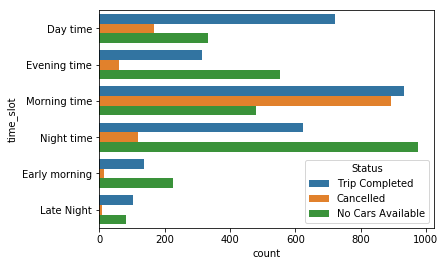

In [443]:
#slots as per status of the ride
# we are using countplot here as its thought of as a histogram across a categorical, instead of quantitative, variable that we want to show 
sns.countplot(y = "time_slot", hue = "Status", data = df)

#### Well, above graph clearly shows that the highest number of cancellations are done in "Morning time" time slot only and the no cabs avaliable is there during the "Night time"

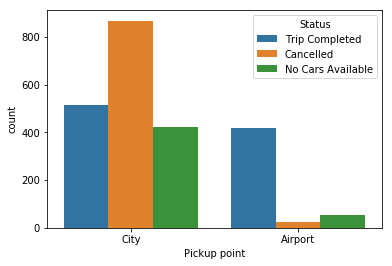

In [444]:
#plot to show the morning slot for cancellation of rides
df_morning_early = df[df.time_slot == "Morning time"]
sns.countplot(x = "Pickup point", hue = "Status", data = df_morning_early)

#### In the Morning time looks like the request "City - Airport" is the culprit for cancellations 

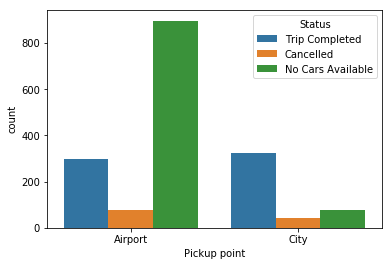

In [445]:
#plot to show the Evening to ealry night time slot for no rides avaliable for rides
df_night = df[df.time_slot == "Night time"]
sns.countplot(x = "Pickup point", hue = "Status", data = df_night)

#### Its clear from above graph that the request "Airport - City" during night times gives a 'No cars Available' notification or indications to the customers, causing loss to Uber despite higt amount demand

#### Demand and supply for Morning and night time slot can be seen in above two graphs, it not good to look at as its poor to see the numbers where Uber could not supply the high demand,...
#### Lets look at demand supply at hourly manner to get a high level idea of it...

In [446]:
# adding new column for demand, as all requests are demand hence maarking all as 1
df['Demand'] = 1
df.head(5)

,Request id,Pickup point,Driver id,Status,Request timestamp,Drop timestamp,Request month,Request dayofweek,Request day,Request hour,time_slot,Demand
0,619,Airport,1.0,Trip Completed,2016-07-11 11:51:00,2016-07-11 13:00:00,7,0,11,11,Day time,1
1,867,Airport,1.0,Trip Completed,2016-07-11 17:57:00,2016-07-11 18:47:00,7,0,11,17,Evening time,1
2,1807,City,1.0,Trip Completed,2016-07-12 09:17:00,2016-07-12 09:58:00,7,1,12,9,Morning time,1
3,2532,Airport,1.0,Trip Completed,2016-07-12 21:08:00,2016-07-12 22:03:00,7,1,12,21,Night time,1
4,3112,City,1.0,Trip Completed,2016-07-13 08:33:16,2016-07-13 09:25:47,7,2,13,8,Morning time,1


In [447]:
#creating a Supply column as 'Trip Completed' is supply = 1 and others 0
df["Supply"] = df["Status"].apply(lambda x: 1 if(x=='Trip Completed') else 0)
df.tail(5)

,Request id,Pickup point,Driver id,Status,Request timestamp,Drop timestamp,Request month,Request dayofweek,Request day,Request hour,time_slot,Demand,Supply
6740,6745,City,NaN,No Cars Available,2016-07-15 23:49:03,NaT,7,4,15,23,Late Night,1,0
6741,6752,Airport,NaN,No Cars Available,2016-07-15 23:50:05,NaT,7,4,15,23,Late Night,1,0
6742,6751,City,NaN,No Cars Available,2016-07-15 23:52:06,NaT,7,4,15,23,Late Night,1,0
6743,6754,City,NaN,No Cars Available,2016-07-15 23:54:39,NaT,7,4,15,23,Late Night,1,0
6744,6753,Airport,NaN,No Cars Available,2016-07-15 23:55:03,NaT,7,4,15,23,Late Night,1,0


In [448]:
#demand supply gap
df['Demand-Supply Gap'] = df['Demand'] - df['Supply']
df

,Request id,Pickup point,Driver id,Status,Request timestamp,Drop timestamp,Request month,Request dayofweek,Request day,Request hour,time_slot,Demand,Supply,Demand-Supply Gap
0,619,Airport,1.0,Trip Completed,2016-07-11 11:51:00,2016-07-11 13:00:00,7,0,11,11,Day time,1,1,0
1,867,Airport,1.0,Trip Completed,2016-07-11 17:57:00,2016-07-11 18:47:00,7,0,11,17,Evening time,1,1,0
2,1807,City,1.0,Trip Completed,2016-07-12 09:17:00,2016-07-12 09:58:00,7,1,12,9,Morning time,1,1,0
3,2532,Airport,1.0,Trip Completed,2016-07-12 21:08:00,2016-07-12 22:03:00,7,1,12,21,Night time,1,1,0
4,3112,City,1.0,Trip Completed,2016-07-13 08:33:16,2016-07-13 09:25:47,7,2,13,8,Morning time,1,1,0
5,3879,Airport,1.0,Trip Completed,2016-07-13 21:57:28,2016-07-13 22:28:59,7,2,13,21,Night time,1,1,0
6,4270,Airport,1.0,Trip Completed,2016-07-14 06:15:32,2016-07-14 07:13:15,7,3,14,6,Morning time,1,1,0
7,5510,Airport,1.0,Trip Completed,2016-07-15 05:11:52,2016-07-15 06:07:52,7,4,15,5,Morning time,1,1,0
8,6248,City,1.0,Trip Completed,2016-07-15 17:57:27,2016-07-15 18:50:51,7,4,15,17,Evening time,1,1,0
9,267,City,2.0,Trip Completed,2016-07-11 06:46:00,2016-07-11 07:25:00,7,0,11,6,Morning time,1,1,0


In [449]:
Demand_Supply = df.groupby(['time_slot','Pickup point'])[['Demand', 'Supply','Demand-Supply Gap']].sum().reset_index()
Demand_Supply

,time_slot,Pickup point,Demand,Supply,Demand-Supply Gap
0,Day time,Airport,478,327,151
1,Day time,City,746,395,351
2,Early morning,Airport,181,67,114
3,Early morning,City,194,69,125
4,Evening time,Airport,713,155,558
5,Evening time,City,215,160,55
6,Late Night,Airport,98,62,36
7,Late Night,City,96,41,55
8,Morning time,Airport,498,418,80
9,Morning time,City,1808,514,1294


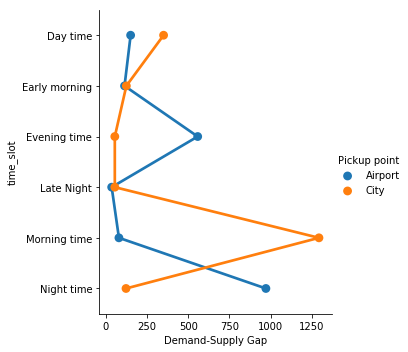

In [450]:
#D_S = pd.melt(Demand_Supply,id_vars=['time_slot'])
#Plotting the demand supply graphs 
#reason of using factor plot here is since we are doing aggregation and what better than Factor plot for this use
sns.factorplot(y="time_slot", x="Demand-Supply Gap",hue='Pickup point' ,data=Demand_Supply)

In [451]:
#Exporting for tablau
#df.to_csv("UberDF.csv", sep=',', index=False)
#Demand_Supply.to_csv("DemandSupplyUberDF.csv", sep=',', index=False)

#### The above graph shows that the 'Morning slot' is the time frame where there is the maximum 'Demand-Supply' gap and is for the "City-Airport" request specifically which is mostly due to 'Cancellation' of rides, followed by 'Night time' and for request "Airtport-City" which is mostly due to 'No cabs Available' status